# **Data Understanding**

**Informasi Dataset**
Dataset ini berisi data untuk estimasi tingkat obesitas pada individu dari negara Meksiko, Peru, dan Kolombia, berdasarkan kebiasaan makan dan kondisi fisik mereka. Data berisi 17 atribut dan 2111 catatan, catatan diberi label dengan variabel kelas NObesity (Tingkat Obesitas), yang memungkinkan klasifikasi data menggunakan nilai Berat Badan Kurang, Berat Badan Normal, Kelebihan Berat Badan Tingkat I, Kelebihan Berat Badan Tingkat II, Tipe Obesitas I, Tipe Obesitas II, dan Tipe Obesitas III. 77% data dihasilkan secara sintetis menggunakan alat Weka dan filter SMOTE, 23% data dikumpulkan langsung dari pengguna melalui platform web.

Dataset ini terdiri dari berbagai fitur yang berhubungan dengan gaya hidup, pola makan, dan kondisi fisik individu. Fitur Gender menunjukkan jenis kelamin responden. Age merepresentasikan usia responden dalam tahun. Height dan Weight masing-masing menunjukkan tinggi badan (dalam meter) dan berat badan (dalam kilogram). Fitur Family_History_With_Overweight bersifat biner dan mengindikasikan apakah terdapat anggota keluarga yang mengalami kelebihan berat badan. FAVC menunjukkan apakah responden sering mengonsumsi makanan berkalori tinggi, sementara FCVC menggambarkan frekuensi konsumsi sayuran dalam makanan. NCP merepresentasikan jumlah makanan utama yang dikonsumsi setiap hari, dan CAEC menunjukkan kebiasaan ngemil di antara waktu makan utama. Fitur SMOKE menunjukkan apakah responden merokok, sedangkan CH2O merepresentasikan jumlah air yang diminum setiap hari. SCC menginformasikan apakah responden memantau asupan kalori hariannya. FAF menunjukkan frekuensi aktivitas fisik, dan TUE mencerminkan durasi penggunaan perangkat teknologi seperti ponsel, video game, televisi, dan komputer. CALC menunjukkan seberapa sering responden mengonsumsi alkohol, sedangkan MTRANS menggambarkan jenis transportasi yang biasa digunakan. Terakhir, NObeyesdad merupakan target klasifikasi yang menunjukkan kategori tingkat obesitas responden.

# **Import Library**

In [ ]:
# Library manipulasi data
import pandas as pd
import numpy as np

# Mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library pra-pemrosesan data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Library model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library evaluasi model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Library hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [ ]:
# Hubungkan ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Memuat Dataset**

In [ ]:
# Load dataset dari gdrive
data = pd.read_csv('/content/drive/MyDrive/Dicoding/Obesity Project/Obesity-dataset.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# deklarasi fitur numerik
num_feature = data.select_dtypes(include=['number'])

# deklarasi fitur kategorikal
cat_feature = data.select_dtypes(include=['object'])

# Menampilkan nama fitur
print(f"fitur numerikal = {num_feature.columns.tolist()}")
print(f"fitur kategorikal = {cat_feature.columns.tolist()}")

fitur numerikal = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
fitur kategorikal = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [ ]:
# Label mapping tiap fitur kategorikal
label_map = {
    'Gender': {'Female': 0, 'Male': 1},
    'FAVC': {'no': 0, 'yes': 1},
    'SCC': {'no': 0, 'yes': 1},
    'SMOKE': {'no': 0, 'yes': 1},
    'family_history_with_overweight': {'no': 0, 'yes': 1}
}

ordinal_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

label_map_target = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# **Exploratory Data Analysis (EDA)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Periksa nilai unik pada fitur kategorikal
for col in cat_feature.columns:
    print(f"Nilai unik untuk {col}: {cat_feature[col].unique()}")

Nilai unik untuk Gender: ['Female' 'Male']
Nilai unik untuk CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Nilai unik untuk FAVC: ['no' 'yes']
Nilai unik untuk SCC: ['no' 'yes']
Nilai unik untuk SMOKE: ['no' 'yes']
Nilai unik untuk family_history_with_overweight: ['yes' 'no']
Nilai unik untuk CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Nilai unik untuk MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Nilai unik untuk NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
# Cek missing value
data.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
# Cek jumlah data duplikat
data.duplicated().sum()

np.int64(24)

In [ ]:
# Fungsi menampilkan distribusi fitur
def plot_feature_distributions(data, feature_columns):
    """
    Menampilkan histogram distribusi untuk fitur
    """
    n_cols = 5
    bins = 20
    num_vars = len(feature_columns)
    n_rows = -(-num_vars // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(feature_columns):
        data[column].hist(ax=axes[i], bins=bins, edgecolor='black')
        axes[i].set_title(f'Distribusi: {column}')
        axes[i].set_xlabel('Nilai')
        axes[i].set_ylabel('Frekuensi')
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)
    # Menghapus subplot yang kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

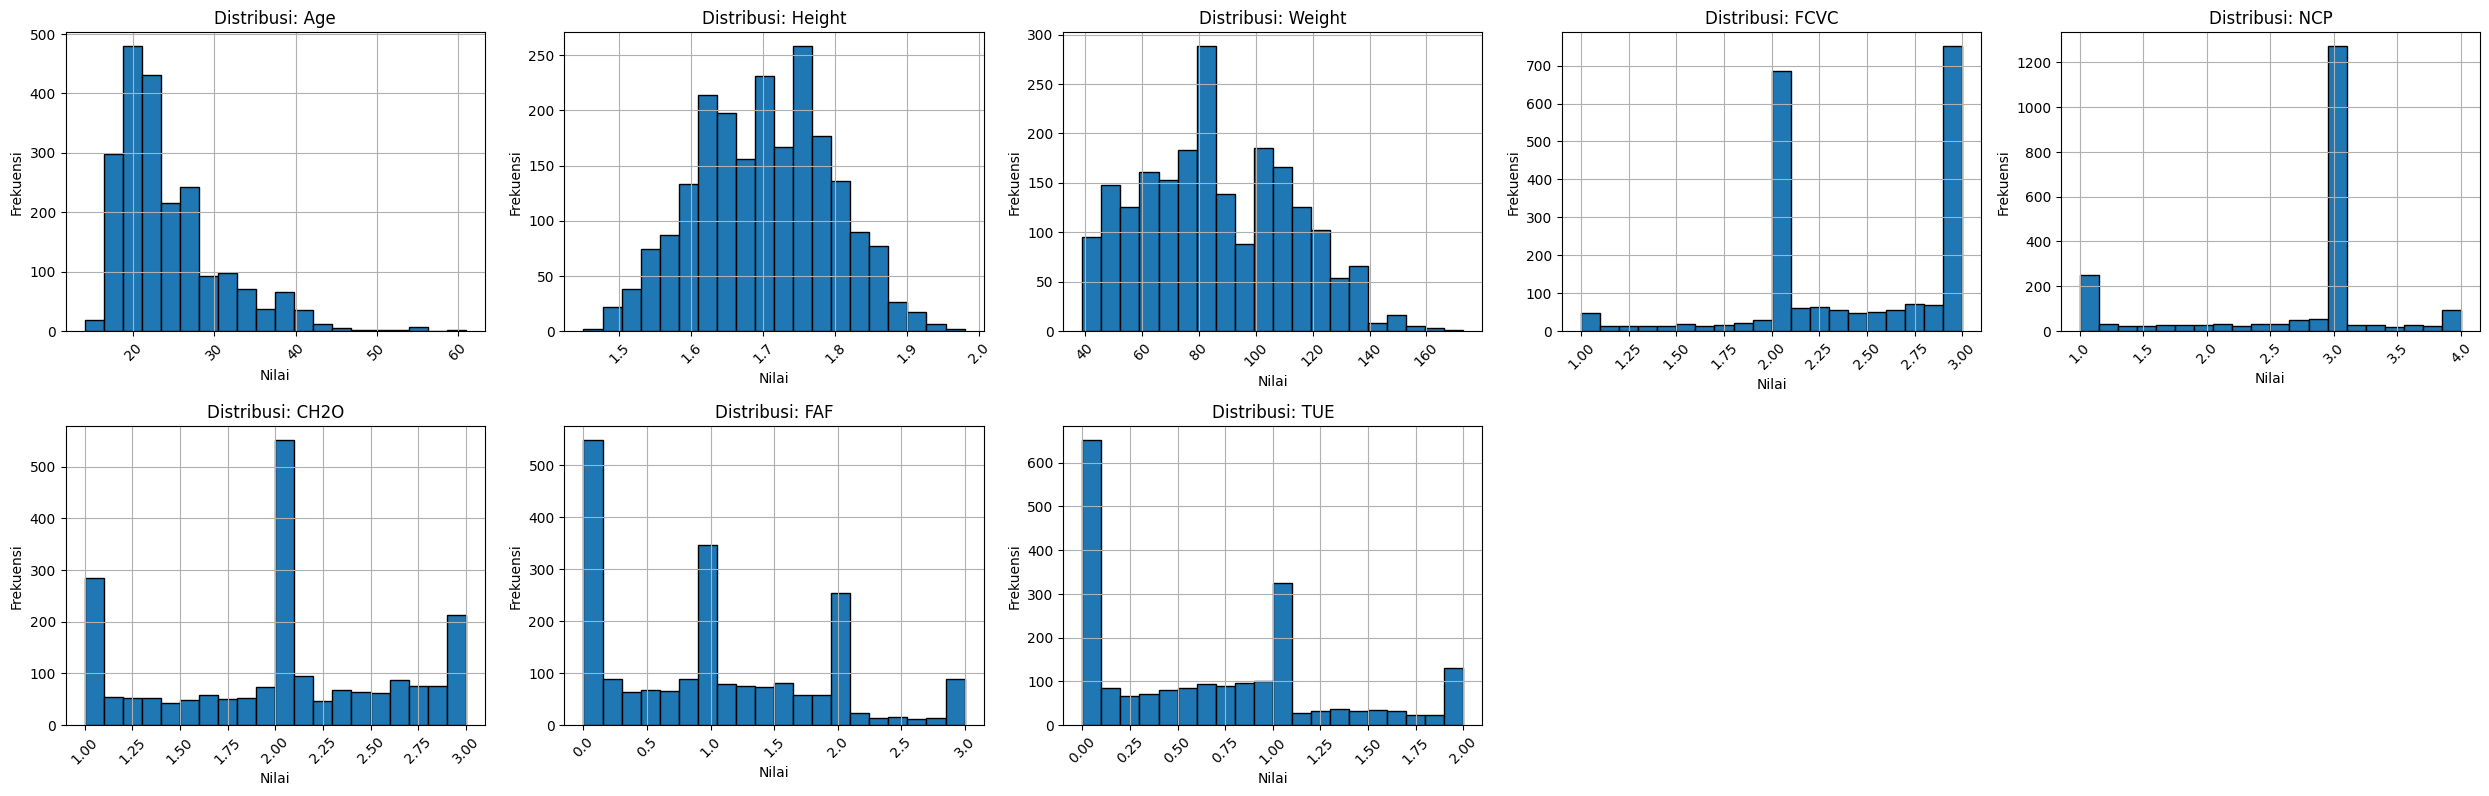

In [ ]:
# Distribusi fitur numerikal
plot_feature_distributions(data, num_feature.columns)

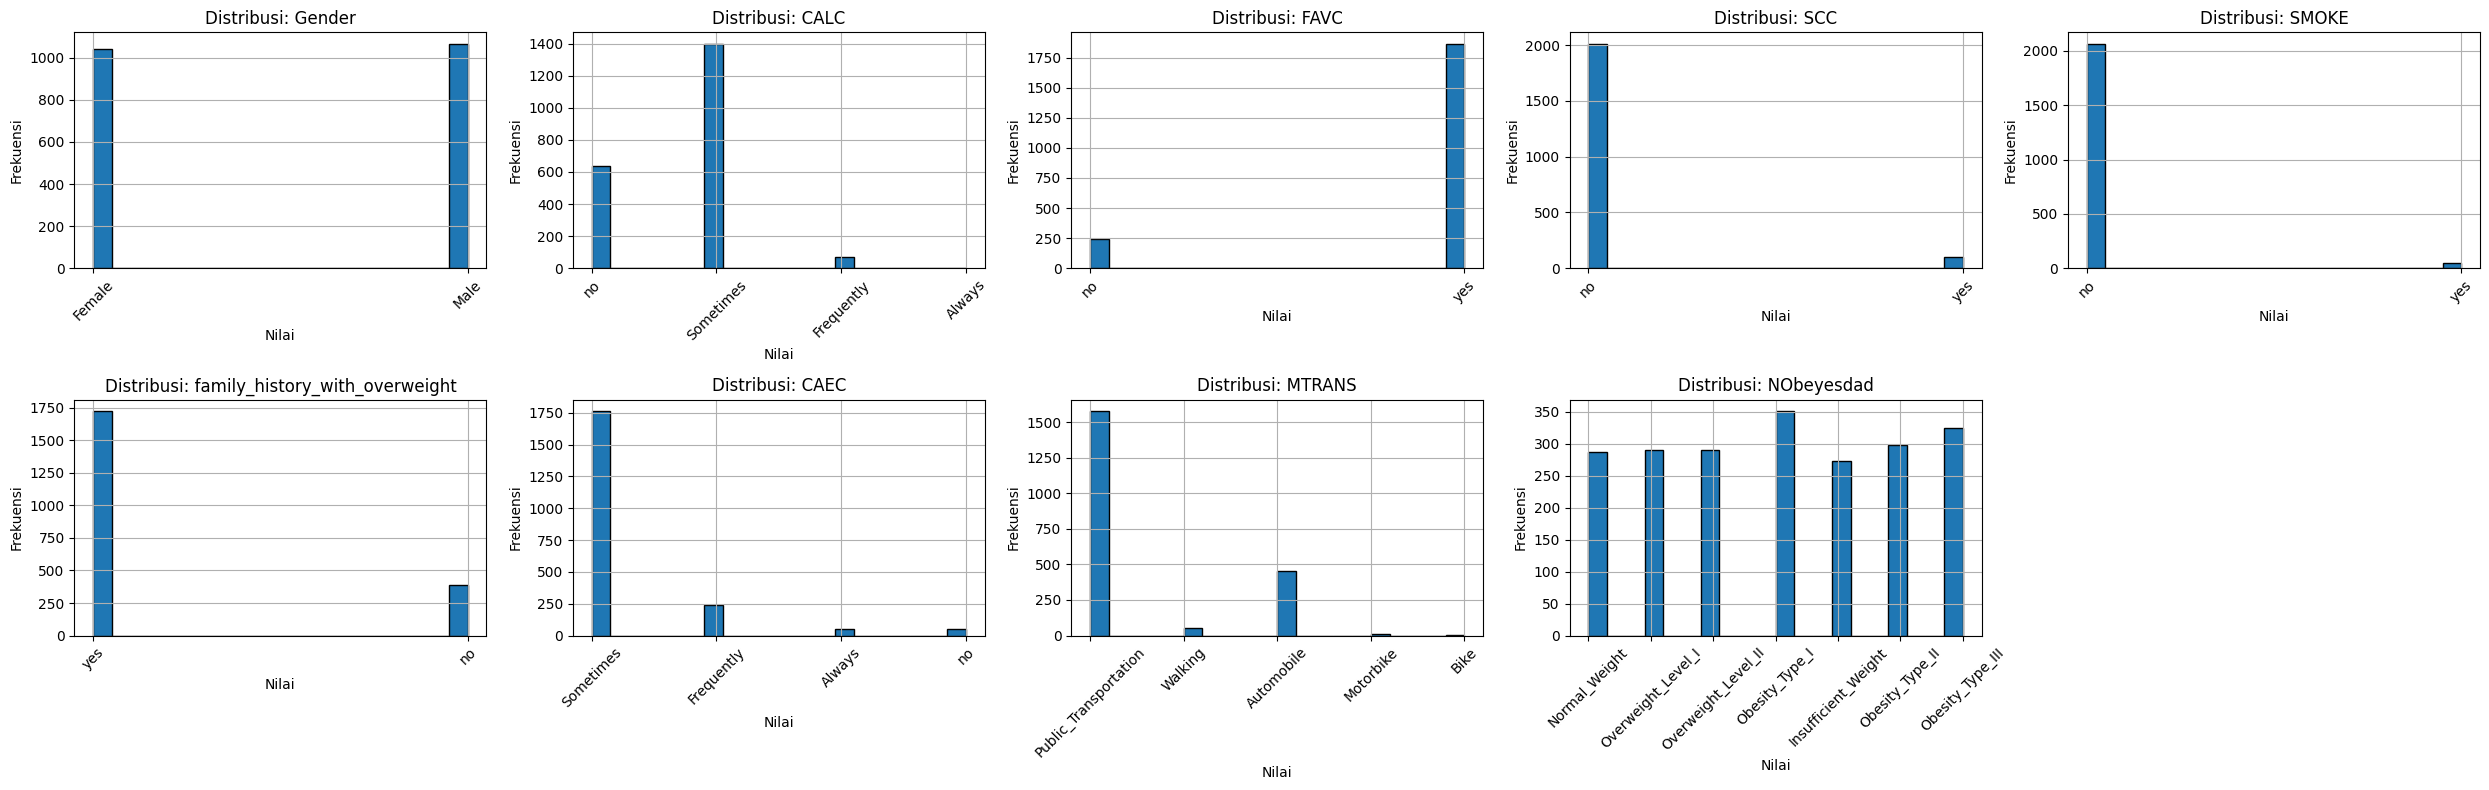

In [ ]:
# Distribusi fitur kategorikal
plot_feature_distributions(data, cat_feature.columns)

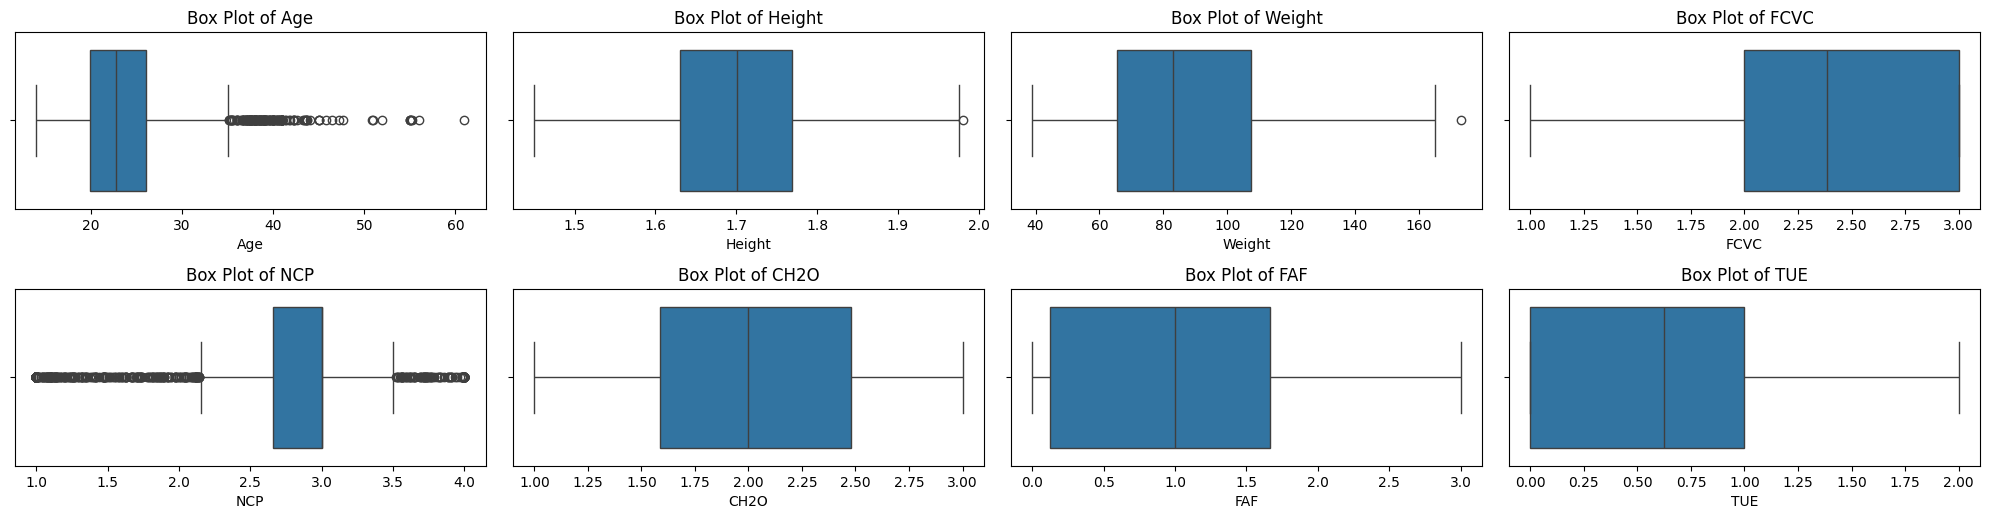

In [ ]:

num_plots = len(num_feature)
n_cols, n_rows = 4 , 4

# Buat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# Iterasi membuat box plot
for i, fitur in enumerate(num_feature):
    sns.boxplot(x=data[fitur], ax=axes[i])
    axes[i].set_title(f'Box Plot of {fitur}')
    axes[i].set_xlabel(fitur)

# Hapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Encoding untuk keperluan EDA
data_EDA = data.copy()
data_EDA = data_EDA.select_dtypes(include=['object'])

# Label Encoding
for col, mapping in label_map.items():
    data_EDA[col] = data_EDA[col].map(mapping)

# Ordinal Encoding
data_EDA['CALC'] = data_EDA['CALC'].map(ordinal_map)
data_EDA['CAEC'] = data_EDA['CAEC'].map(ordinal_map)

# One-hot Encoding (MTRANS)
onehot = pd.get_dummies(data_EDA['MTRANS'], prefix='MTRANS')
data_EDA = pd.concat([data_EDA.drop('MTRANS', axis=1), onehot], axis=1)

# Encode target
data_EDA['NObeyesdad'] = data_EDA['NObeyesdad'].map(label_map_target)

# Pastikan semua numerik
data_EDA = data_EDA.astype(float)

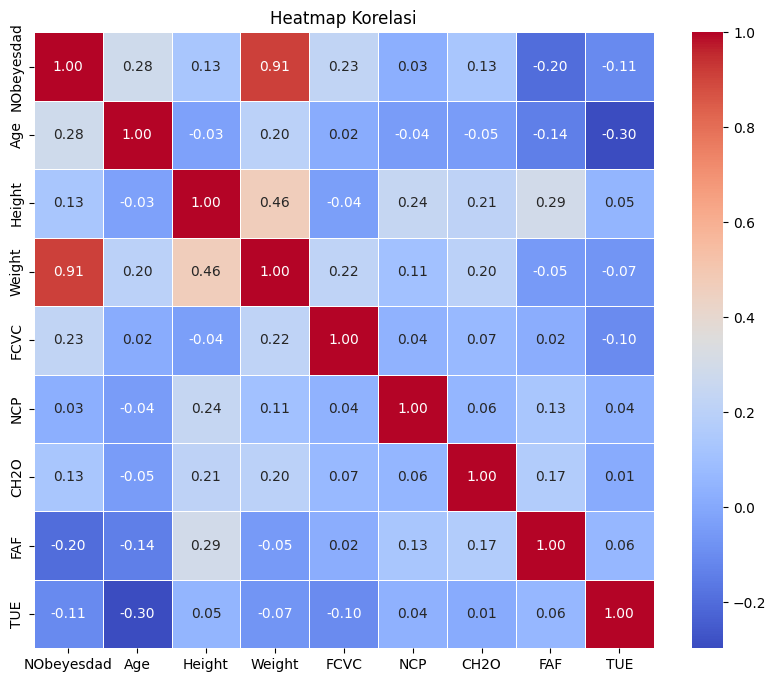

In [ ]:
def plot_correlation_heatmap(feature):
    plt.figure(figsize=(10, 8))
    correlation_matrix = feature.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap Korelasi')
    plt.show()

# Heatmap korelasi fitur numerik dengan target
num_feature_eda = pd.concat([data_EDA['NObeyesdad'], data.select_dtypes(include=['number'])], axis=1)
plot_correlation_heatmap(num_feature_eda)

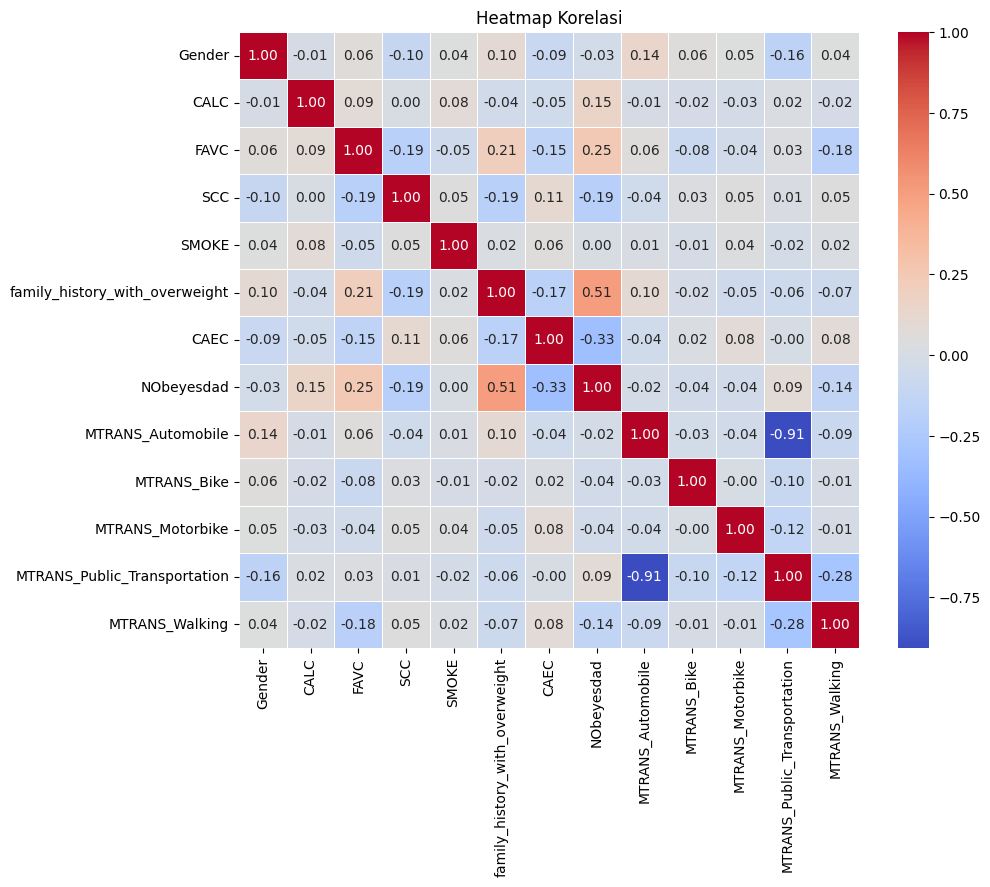

In [ ]:
# Heatmap korelasi fitur kategorikal dengan target
cat_feature_eda = data_EDA.select_dtypes(include=['number'])
plot_correlation_heatmap(cat_feature_eda)

Pada tahapan EDA terlihat beberapa fitur seperti age dan NCP **memiliki outliers** yang kemungkinan merupakan variasi data yang minoritas (variansi yang rendah), kemudian **terdapat data duplicate** yang perlu ditangani, tidak ada missing value, terlihat juga beberapa distribusi yang skewed untuk beberapa fitur numerikal dan distribusi yang timpang pada beberapa fitur kategorikal namun untuk **target sudah cukup seimbang** antara kelasnya. Pada korelasi fitur numerikal tidak ada fitur yang multikolinearitas. **Jadi fokus pembersihan data adalah menghapus data duplikat dan mengurangi outliers saja**. Dilihat dari heatmap korelasi, fitur dengan korelasi positif tertinggi dengan target adalah weight, age, FAVC dan family_history_with_overweight. selain itu beberapa fitur memiliki korelasi positif dan negatif yang kecil dalam rentang -0.35 sampai 0.25 untuk sementara fitur akan digunakan semua kecuali jika akurasi model buruk sehingga perlu melakukan tahapan seleksi fitur.

# **Data Preprocessing**

## Data Cleaning

Pada tahapan ini akan dilakukan pembersihan data duplikat dan meminimalkan outliers dari fitur Age

In [ ]:
# Menghapus data duplikat
data_cleaned = data.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {data_cleaned.shape}")

Jumlah data setelah menghapus duplikat: (2087, 17)


In [ ]:
# fungsi untuk deteksi outliers
def deteksi_outliers(df, fitur):
    for col in fitur:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        prop = (count / len(df)) * 100

        print(f"Fitur {col}: Jumlah outliers = {count}, Proporsi = {prop:.2f}%")

deteksi_outliers(data_cleaned, num_feature)

Fitur Age: Jumlah outliers = 167, Proporsi = 8.00%
Fitur Height: Jumlah outliers = 1, Proporsi = 0.05%
Fitur Weight: Jumlah outliers = 1, Proporsi = 0.05%
Fitur FCVC: Jumlah outliers = 0, Proporsi = 0.00%
Fitur NCP: Jumlah outliers = 577, Proporsi = 27.65%
Fitur CH2O: Jumlah outliers = 0, Proporsi = 0.00%
Fitur FAF: Jumlah outliers = 0, Proporsi = 0.00%
Fitur TUE: Jumlah outliers = 0, Proporsi = 0.00%


In [ ]:
# Drop baris dengan nilai maksimum untuk 'Weight'
max_weight_index = data_cleaned['Weight'].idxmax()
data_cleaned = data_cleaned.drop(max_weight_index)

# Drop baris dengan nilai maksimum untuk 'Height'
max_height_index = data_cleaned['Height'].idxmax()
data_cleaned = data_cleaned.drop(max_height_index)

# Transformasi distribusi Age dengan log transform untuk mengurangi outliers
data_cleaned['Age'] = np.log1p(data_cleaned['Age'].fillna(0))

In [ ]:
# Deteksi Outliers
deteksi_outliers(data_cleaned, num_feature)

Fitur Age: Jumlah outliers = 93, Proporsi = 4.46%
Fitur Height: Jumlah outliers = 0, Proporsi = 0.00%
Fitur Weight: Jumlah outliers = 0, Proporsi = 0.00%
Fitur FCVC: Jumlah outliers = 0, Proporsi = 0.00%
Fitur NCP: Jumlah outliers = 577, Proporsi = 27.67%
Fitur CH2O: Jumlah outliers = 0, Proporsi = 0.00%
Fitur FAF: Jumlah outliers = 0, Proporsi = 0.00%
Fitur TUE: Jumlah outliers = 0, Proporsi = 0.00%


## Data Preparation

Pada tahapan ini akan dilakukan data splitting, encoding untuk fitur kategorikal dan scaling untuk fitur numerikal sebelum digunakan untuk pelatihan model.

In [ ]:
# Data Splitting 80:20 dengan Stratified Sampling
X = data_cleaned.drop(['NObeyesdad'], axis=1)
y = data_cleaned["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data hasil splitting
print(f"Jumlah data train: {X_train.shape}")
print(f"Jumlah data test: {X_test.shape}")

Jumlah data train: (1668, 16)
Jumlah data test: (417, 16)


In [ ]:
# Tahapan Encoding untuk training
# Encoding data training
X_train_encoded = X_train.copy()

for col, mapping in label_map.items():
    X_train_encoded[col] = X_train_encoded[col].map(mapping)

X_train_encoded['CALC'] = X_train_encoded['CALC'].map(ordinal_map)
X_train_encoded['CAEC'] = X_train_encoded['CAEC'].map(ordinal_map)

# One-hot encoding untuk MTRANS di training
onehot_train = pd.get_dummies(X_train_encoded['MTRANS'], prefix='MTRANS')
X_train_encoded = pd.concat([X_train_encoded.drop('MTRANS', axis=1), onehot_train], axis=1)
onehot_columns = onehot_train.columns

# Encoding data test
X_test_encoded = X_test.copy()

for col, mapping in label_map.items():
    X_test_encoded[col] = X_test_encoded[col].map(mapping)

X_test_encoded['CALC'] = X_test_encoded['CALC'].map(ordinal_map)
X_test_encoded['CAEC'] = X_test_encoded['CAEC'].map(ordinal_map)

# One-hot encoding untuk MTRANS di test (sinkronkan kolom dengan training)
onehot_test = pd.get_dummies(X_test_encoded['MTRANS'], prefix='MTRANS')
onehot_test = onehot_test.reindex(columns=onehot_columns, fill_value=0)
X_test_encoded = pd.concat([X_test_encoded.drop('MTRANS', axis=1), onehot_test], axis=1)

# Encoding target
y_train_encoded = y_train.map(label_map_target).astype(int)
y_test_encoded = y_test.map(label_map_target).astype(int)

# Pastikan hasil encoding bertipe data numerik
X_train_encoded = X_train_encoded.astype(float)
X_test_encoded = X_test_encoded.astype(float)

In [ ]:
# Normalisasi MinMax Scaling untuk semua fitur numerik
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[num_feature.columns])
X_test_scaled = scaler.transform(X_test[num_feature.columns])

# Buat DataFrame hasil scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_feature.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_feature.columns, index=X_test.index)

In [ ]:
# Gabungkan data numerik dan kategorikal yang sudah diproses
X_train_final = pd.concat([X_train_encoded.drop(columns=num_feature.columns), X_train_scaled], axis=1)
X_test_final = pd.concat([X_test_encoded.drop(columns=num_feature.columns), X_test_scaled], axis=1)
y_train_final = y_train_encoded
y_test_final = y_test_encoded

# Periksa dimensi data akhir
print("Dimensi data X_train akhir setelah One-Hot Encoding dan scaling:", X_train_final.shape)
print("Dimensi data X_test akhir setelah One-Hot Encoding dan scaling:", X_test_final.shape)

Dimensi data X_train akhir setelah One-Hot Encoding dan scaling: (1668, 20)
Dimensi data X_test akhir setelah One-Hot Encoding dan scaling: (417, 20)


# **Modelling**

Pada tahap ini dilakukan modelling dengan dua jenis algoritma ensemble yaitu Random Forest dan Gradient Boosting untuk mencari model dengan performa terbaik terhadap dataset tanpa pengaturan parameter.

In [ ]:
# Definisikan variabel
X_train = X_train_final
X_test = X_test_final
y_train = y_train_final
y_test = y_test_final

# Fungsi untuk evaluasi model
def evaluate_model(model, models, model_name):
    # Evaluasi model pada data train dan test, lalu masukkan hasilnya ke dataframe
    models.loc[model_name, 'train_acc'] = round(model.score(X_train, y_train), 2)
    models.loc[model_name, 'test_acc'] = round(model.score(X_test, y_test), 2)

    models.loc[model_name, 'train_prec'] = round(precision_score(y_train, model.predict(X_train), average='macro'), 2)
    models.loc[model_name, 'test_prec'] = round(precision_score(y_test, model.predict(X_test), average='macro'), 2)

    models.loc[model_name, 'train_rec'] = round(recall_score(y_train, model.predict(X_train), average='macro'), 2)
    models.loc[model_name, 'test_rec'] = round(recall_score(y_test, model.predict(X_test), average='macro'), 2)

    models.loc[model_name, 'train_f1'] = round(f1_score(y_train, model.predict(X_train), average='macro'), 2)
    models.loc[model_name, 'test_f1'] = round(f1_score(y_test, model.predict(X_test), average='macro'), 2)

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=[],
                      columns=['train_acc', 'test_acc', 'train_prec', 'test_prec', 'train_rec', 'test_rec', 'train_f1', 'test_f1'])

In [ ]:
# Inisialisasi dan latih model RandomForest
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

# Evaluasi model RandomForest
evaluate_model(RF, models, 'RandomForest')

In [ ]:
# Inisialisasi dan latih model GradientBoosting
GDB = GradientBoostingClassifier(random_state=42)
GDB.fit(X_train, y_train)

# Evaluasi model GradientBoosting
evaluate_model(GDB, models, 'Boosting')

In [ ]:
# Tampilkan hasil evaluasi
models

,train_acc,test_acc,train_prec,test_prec,train_rec,test_rec,train_f1,test_f1
RandomForest,1.0,0.95,1.0,0.95,1.0,0.95,1.0,0.95
Boosting,1.0,0.97,1.0,0.97,1.0,0.97,1.0,0.97


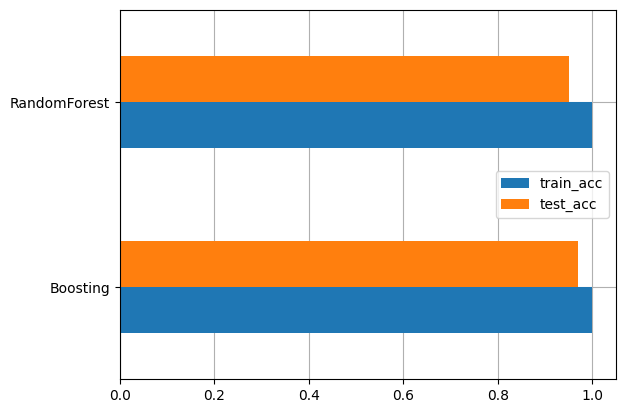

In [ ]:
# Visualsiasi akurasi training dan testing model RF dan GDB
fig, ax = plt.subplots()
models[['train_acc', 'test_acc']].sort_values(by='test_acc', ascending=False).plot(kind='barh', ax=ax, zorder=2)
ax.grid(zorder=0)
plt.show()

In [ ]:
# Classification Report
print("Classification Report Random Forest:")
RF_pred = RF.predict(X_test)
print(classification_report(y_test, RF_pred))

print("\nClassification Report Gradient Boosting:")
GDB_pred = GDB.predict(X_test)
print(classification_report(y_test, GDB_pred))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.84      0.95      0.89        56
           2       0.91      0.91      0.91        55
           3       0.95      0.90      0.92        58
           4       0.99      0.97      0.98        70
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        65

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.96      0.95      0.95       417


Classification Report Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.95      0.95        56
           2       0.91      0.91      0.91        55
           3       0.95      0.97      0.96        58
           4       1.00      0.96      0.98        70

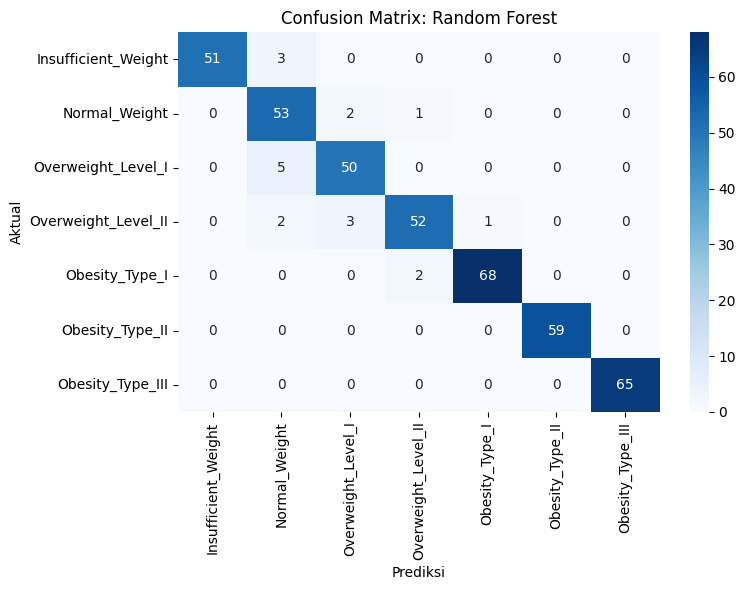

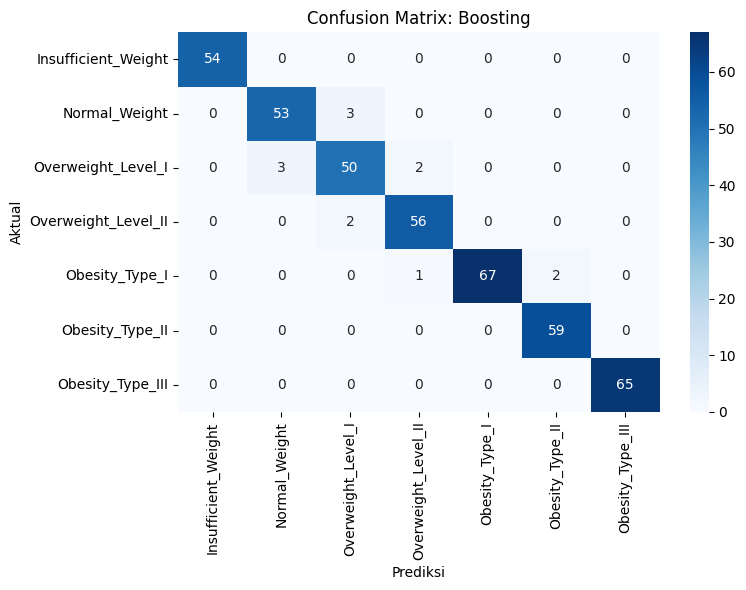

In [ ]:
# List label yang sesuai urutan mapping
ordered_labels = list(label_map_target.keys())

# Fungsi visualisasi Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred) # Calculate confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=ordered_labels,
                yticklabels=ordered_labels)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix untuk setiap model
plot_confusion_matrix(y_test, RF_pred, 'Random Forest')
plot_confusion_matrix(y_test, GDB_pred, 'Boosting')

Model dengan Gradient boosting menunjukkan akurasi tertinggi dalam menangani data training dan testing dibandingkan model random forest, model yang digunakan adalah model dengan default parameter sehingga masih bisa dilakukan fine tuning untuk mendapat parameter dengan performa optimal

# **Hyperparameter Tuning dan Feature Selection**

Base model yang digunakan adalah Gradiet Boosting karena nilai akurasinya lebih tinggi dibandingkan Random Forest

## Hyperparameter Tuning

In [ ]:
param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'subsample': uniform(0.5, 0.5),
}

In [ ]:
# Model Baseline yang akan di tuning
GDB_baseline = GradientBoostingClassifier(random_state=42)

# Pencarian parameter terbaik dengan Random Search
random_search = RandomizedSearchCV(
    estimator= GDB_baseline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'learning_rate': np.float64(0.1834840422988522), 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 112, 'subsample': np.float64(0.9909204441552655)}
Best Accuracy: 0.9706173239107372


In [ ]:
# Training ulang model dengan parameter terbaik
GDB_tuned = GradientBoostingClassifier(
    n_estimators=112,
    min_samples_split=11,
    min_samples_leaf=9,
    max_features= None,
    max_depth=8,
    learning_rate=0.183,
    subsample=0.991,
    random_state=42,
)

GDB_tuned.fit(X_train, y_train)
evaluate_model(GDB_tuned, models, 'GDB_tuned')
models

,train_acc,test_acc,train_prec,test_prec,train_rec,test_rec,train_f1,test_f1
RandomForest,1.0,0.95,1.0,0.95,1.0,0.95,1.0,0.95
Boosting,1.0,0.97,1.0,0.97,1.0,0.97,1.0,0.97
GDB_tuned,1.0,0.98,1.0,0.98,1.0,0.98,1.0,0.98


In [ ]:
# Classification report tuned model
GDB_tuned_pred = GDB_tuned.predict(X_test)
print(classification_report(y_test, GDB_tuned_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.96      0.96        56
           2       0.96      0.95      0.95        55
           3       0.97      0.98      0.97        58
           4       1.00      0.99      0.99        70
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        65

    accuracy                           0.98       417
   macro avg       0.98      0.98      0.98       417
weighted avg       0.98      0.98      0.98       417



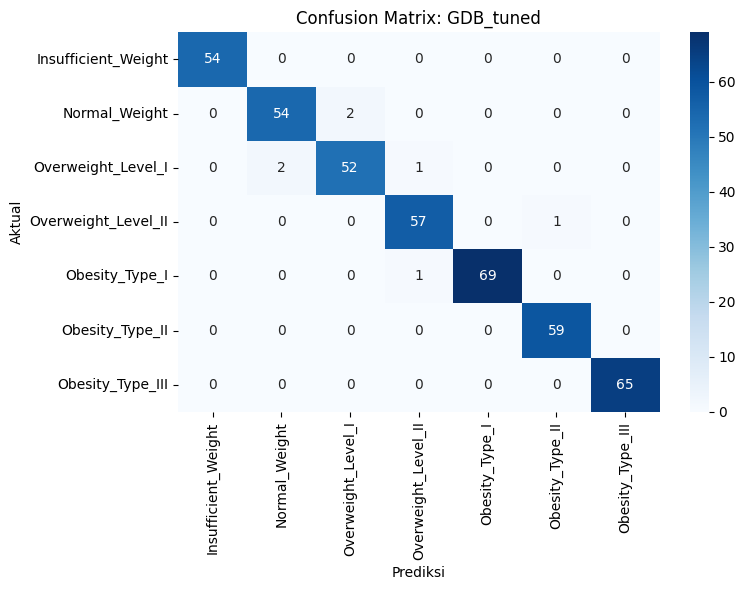

In [ ]:
# Plot confusion matrix tuned model
plot_confusion_matrix(y_test, GDB_tuned_pred, 'GDB_tuned')

## Feature Selection

Mengurangi fitur berdasarkan feature importance model GDB yang sudah dilatih

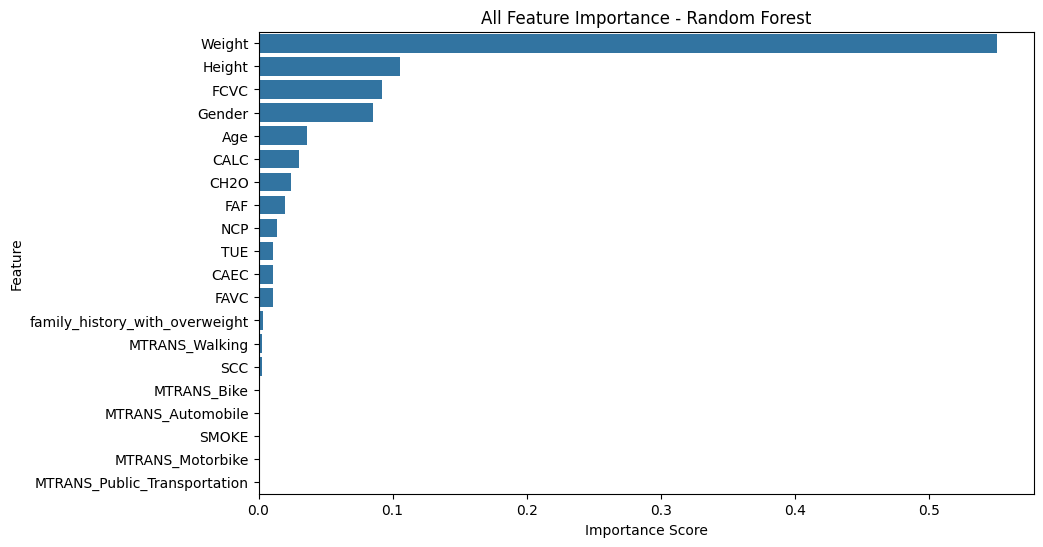

In [ ]:
# Seleksi fitur terpenting dari hasil feature importance Gradient Boosting
feature_importances = GDB.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan Visualisasi fitur importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('All Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Memilih 15 Fitur Terbaik
Selected_features = importance_df.sort_values(by='Importance', ascending=False).head(15)['Feature'].tolist()

# Membuat data baru dengan fitur terpilih
X_train_selected = X_train[Selected_features]
X_test_selected = X_test[Selected_features]

# Inisialisasi dan latih ulang model
GDB_selected = GradientBoostingClassifier(
    n_estimators=112,
    min_samples_split=11,
    min_samples_leaf=9,
    max_features= None,
    max_depth=8,
    learning_rate=0.183,
    subsample=0.991,
    random_state=42,
)

GDB_selected.fit(X_train_selected, y_train)

# Evaluasi model
GDB_selected_pred = GDB_selected.predict(X_test_selected)
print(classification_report(y_test, GDB_selected_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.96      0.96        56
           2       0.96      0.96      0.96        55
           3       0.98      0.98      0.98        58
           4       1.00      0.99      0.99        70
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        65

    accuracy                           0.99       417
   macro avg       0.98      0.99      0.99       417
weighted avg       0.99      0.99      0.99       417



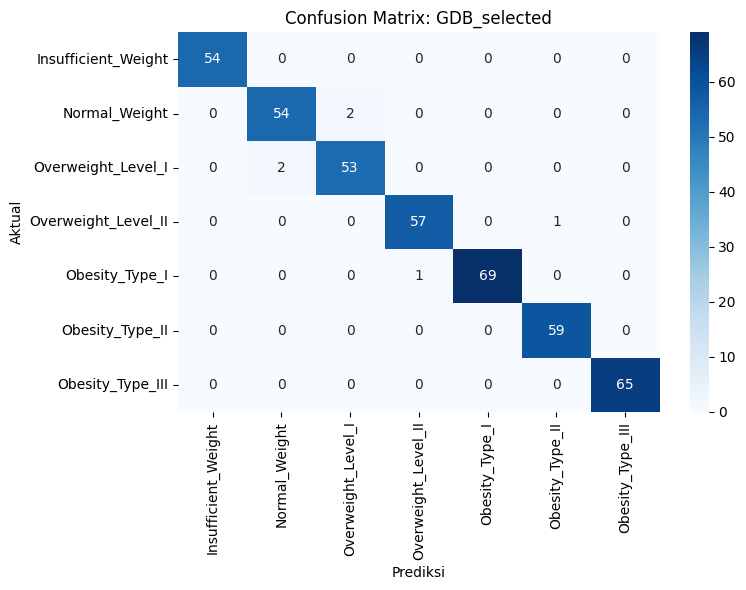

In [121]:
# Plot confusion matrix tuned model & feature selection
plot_confusion_matrix(y_test, GDB_selected_pred, 'GDB_selected')

Hasil model dengan fine tuning saja menunjukkan akurasi sebesar 0.98 meningkat 0.1 dibanding model default sedangkan model dengan fine tuning dan feature selection berdasarkan importance fitur terhadap model menunjukkan akurasi paling maksimum yaitu sebesar 0.99 yang menjadi model dengan performa paling baik dalam tahapan ini.

# **Inference Model**

## Menggunakan Test Set

In [124]:
# Test prediksi dari data test
prediksi = X_test_selected.iloc[:10].copy()
pred_dict = {'y_true': y_test[:10],
             'GDB_selected': GDB_selected.predict(prediksi)}

pd.DataFrame(pred_dict)

,y_true,GDB_selected
419,4,4
1875,6,6
352,1,1
2016,6,6
1397,4,4
1487,4,4
223,1,1
1883,6,6
225,5,5
1491,4,4


## Menggunakan Data Baru

In [127]:
def preprocess_new_data(new_data):
    """
    Fungsi untuk memproses data baru
    """
    num_feature_columns = data.select_dtypes(include=['number']).columns.tolist()

    # Salin data dan transformasi log untuk fitur Age
    new_data_encoded = new_data.copy()
    new_data_encoded['Age'] = np.log1p(new_data_encoded['Age'].fillna(0))

    # Encoding pada label dan fitur ordinal
    for col, mapping in label_map.items():
        new_data_encoded[col] = new_data_encoded[col].map(mapping)

    new_data_encoded['CALC'] = new_data_encoded['CALC'].map(ordinal_map)
    new_data_encoded['CAEC'] = new_data_encoded['CAEC'].map(ordinal_map)

    # One-hot encoding untuk 'MTRANS'
    onehot_test = pd.get_dummies(new_data_encoded['MTRANS'], prefix='MTRANS').reindex(columns=onehot_columns, fill_value=0)
    new_data_encoded = pd.concat([new_data_encoded.drop('MTRANS', axis=1), onehot_test], axis=1)

    # Scaling fitur numerik
    scaled_numerics = pd.DataFrame(
        scaler.transform(new_data_encoded[num_feature_columns]),
        columns=num_feature_columns, index=new_data_encoded.index)

    # Gabungkan fitur numerik (scaled) dan kategorikal
    new_data_final = pd.concat([new_data_encoded.drop(columns=num_feature_columns),
                                scaled_numerics], axis=1)

    # Pastikan urutan kolom sama dengan data pelatihan
    new_data_final = new_data_final[X_train_selected.columns]

    return new_data_final

In [128]:
# Input data baru
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Age': [25],
    'Height': [1.65],
    'Weight': [60],
    'family_history_with_overweight': ['yes'],
    'FAVC': ['yes'],
    'FCVC': [2],
    'NCP': [3],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2],
    'SCC': ['yes'],
    'FAF': [1],
    'TUE': [2],
    'CALC': ['Sometimes'],
    'MTRANS': ['Public_Transportation']
})

# Proses data baru
new_data_final = preprocess_new_data(new_data)

# Prediksi
prediction = GDB_selected.predict(new_data_final)
predicted_label = list(label_map_target.keys())[int(prediction[0])]
print(f"Tingkat obesitas Anda adalah: {predicted_label}")

Tingkat obesitas Anda adalah: Normal_Weight


In [130]:
# Mengambil data baru dari user input interaktif
def get_user_input():
    '''
    Fungsi untuk meminta input interaktif dari pengguna dengan pilihan
    '''
    # Pilihan yang valid untuk input
    gender = input("Masukkan Gender (1.Wanita 2.Pria): ")
    while gender not in ['1', '2']:
        print("Pilihan tidak valid! Pilih 1 untuk Wanita atau 2 untuk Pria!")
        gender = input("Masukkan Gender (1.Wanita 2.Pria): ")
    gender = 'Female' if gender == '1' else 'Male'

    age = float(input("Masukkan Usia: "))
    height = float(input("Masukkan Tinggi Badan (meter, ex: 1.60): "))
    weight = float(input("Masukkan Berat Badan (kg): "))

    family_history = input("Apakah Anda memiliki riwayat keluarga dengan obesitas? (1.Ya 2.Tidak): ")
    while family_history not in ['1', '2']:
        print("Pilihan tidak valid! Pilih 1 untuk Ya atau 2 untuk Tidak!")
        family_history = input("Apakah Anda memiliki riwayat keluarga dengan obesitas? (1.Ya 2.Tidak): ")
    family_history = 'yes' if family_history == '1' else 'no'

    favc = input("Apakah Anda mengonsumsi makanan tinggi kalori? (1.Ya 2.Tidak): ")
    while favc not in ['1', '2']:
        print("Pilihan tidak valid! Pilih 1 untuk Ya atau 2 untuk Tidak!")
        favc = input("Apakah Anda mengonsumsi makanan tinggi kalori? (1.Ya 2.Tidak): ")
    favc = 'yes' if favc == '1' else 'no'

    fcvc = int(input("Seberapa sering Anda mengonsumsi buah dan sayur (Rentang 1-3): "))
    ncp = int(input("Jumlah makanan utama per hari (Rentang 1-4): "))

    caec = input("Kebiasaan ngemil di antara waktu makan? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): ")
    while caec not in ['1', '2', '3', '4']:
        print("Pilihan tidak valid! Pilih 1 untuk Terkadang, 2 untuk Sering, 3 untuk Selalu, atau 4 untuk Tidak.")
        caec = input("Kebiasaan ngemil di antara waktu makan? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): ")
    caec = ['Sometimes', 'Frequently', 'Always', 'no'][int(caec) - 1]

    smoke = input("Apakah Anda merokok? (1.Ya 2.Tidak): ")
    while smoke not in ['1', '2']:
        print("Pilihan tidak valid! Pilih 1 untuk Ya atau 2 untuk Tidak!")
        smoke = input("Apakah Anda merokok? (1.Ya 2.Tidak): ")
    smoke = 'yes' if smoke == '1' else 'no'

    ch2o = int(input("Seberapa banyak air yang Anda minum per hari? (Rentang 1-3 Liter): "))
    scc = input("Apakah anda memonitor kalori harian yang dikonsumsi? (1.Ya 2.Tidak): ")
    while scc not in ['1', '2']:
        print("Pilihan tidak valid! Pilih 1 untuk Ya atau 2 untuk Tidak.")
        scc = input("Apakah anda memonitor kalori harian yang dikonsumsi? (1.Ya 2.Tidak): ")
    scc = 'yes' if scc == '1' else 'no'

    faf = int(input("Seberapa sering Anda melakukan aktivitas fisik? (Rentang 0-3): "))
    tue = int(input("Seberapa sering Anda menggunakan perangkat elektronik? (Rentang 0-2): "))

    calc = input("Seberapa sering Anda mengonsumsi alkohol? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): ")
    while calc not in ['1', '2', '3', '4']:
        print("Pilihan tidak valid! Pilih 1 untuk Terkadang, 2 untuk Sering, 3 untuk Selalu, atau 4 untuk Tidak.")
        calc = input("Seberapa sering Anda mengonsumsi alkohol? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): ")
    calc = ['no', 'Sometimes', 'Frequently', 'Always'][int(calc) - 1]

    mtrans = input("Bagaimana Anda bertransportasi? (1.Transportasi_Umum 2.Berjalan 3.Mobil 4.Motor 5.Sepeda): ")
    while mtrans not in ['1', '2', '3', '4', '5']:
        print("Pilihan tidak valid! Pilih 1 untuk Transportasi_Umum, 2 untuk Berjalan, 3 untuk Mobil, 4 untuk Motor, atau 5 untuk Sepeda.")
        mtrans = input("Bagaimana Anda bertransportasi? (1.Transportasi_Umum 2.Berjalan 3.Mobil 4.Motor 5.Sepeda): ")
    mtrans = ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'][int(mtrans) - 1]

    # Mengembalikan data dalam bentuk dictionary
    return {
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'CH2O': [ch2o],
        'SCC': [scc],
        'FAF': [faf],
        'TUE': [tue],
        'CALC': [calc],
        'MTRANS': [mtrans]
    }

# Ambil dan proses data
new_data = pd.DataFrame(get_user_input())
new_data_final = preprocess_new_data(new_data)

# Prediksi (diuji dengan data teman author dengan normal weight)
prediction = GDB_selected.predict(new_data_final)
predicted_label = list(label_map_target.keys())[int(prediction[0])]
print(f"\nTingkat obesitas Anda adalah: {predicted_label}")

Masukkan Gender (1.Wanita 2.Pria): 1
Masukkan Usia: 19
Masukkan Tinggi Badan (meter, ex: 1.60): 1.61
Masukkan Berat Badan (kg): 57
Apakah Anda memiliki riwayat keluarga dengan obesitas? (1.Ya 2.Tidak): 2
Apakah Anda mengonsumsi makanan tinggi kalori? (1.Ya 2.Tidak): 2
Seberapa sering Anda mengonsumsi buah dan sayur (Rentang 1-3): 3
Jumlah makanan utama per hari (Rentang 1-4): 3
Kebiasaan ngemil di antara waktu makan? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): 1
Apakah Anda merokok? (1.Ya 2.Tidak): 2
Seberapa banyak air yang Anda minum per hari? (Rentang 1-3 Liter): 3
Apakah anda memonitor kalori harian yang dikonsumsi? (1.Ya 2.Tidak): 2
Seberapa sering Anda melakukan aktivitas fisik? (Rentang 0-3): 3
Seberapa sering Anda menggunakan perangkat elektronik? (Rentang 0-2): 2
Seberapa sering Anda mengonsumsi alkohol? (1.Terkadang 2.Sering 3.Selalu 4.Tidak): 4
Bagaimana Anda bertransportasi? (1.Transportasi_Umum 2.Berjalan 3.Mobil 4.Motor 5.Sepeda): 4

Tingkat obesitas Anda adalah: Normal_Weig